# 1. Le perceptron

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

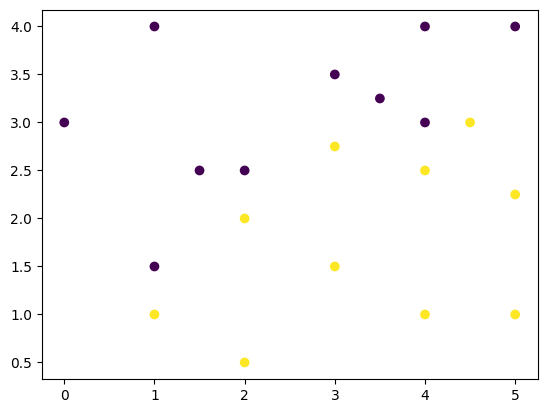

In [3]:
X = np.array([[0,3],[1,1.5],[1,4],[1.5,2.5],[2,2.5],[3,3.5],[3.5,3.25],[4,3],[4,4],[5,4],[1,1],[2,0.5],[2,2],[3,1.5],[3,2.75],[4,1],[4,2.5],[4.5,3],[5,1],[5,2.25]])
y = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_dim=2, activation="sigmoid"))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])

In [ ]:
print(X, y)

In [6]:
history = model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step - accuracy: 0.3000 - loss: 1.0124
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3000 - loss: 1.0114
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3000 - loss: 1.0104
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3000 - loss: 1.0094
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3000 - loss: 1.0084
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3000 - loss: 1.0073
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3000 - loss: 1.0063
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3000 - loss: 1.0053
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3000 - loss: 1.0043
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3000 - loss: 1.0033
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3000 - loss: 1.0023
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy

In [7]:
def visualisation(X, y, model):
    X = X.T
    y = y.T
    fig, ax = plt.subplots()
    ax.scatter(X[0, :], X[1, :], c=y, cmap='bwr', s=50)
    x0_lim = ax.get_xlim()
    x1_lim = ax.get_ylim()

    resolution = 100
    x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
    x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)

    # meshgrid
    X0, X1 = np.meshgrid(x0, x1)

    # assemble (100, 100) -> (10000, 2)
    XX = np.vstack((X0.ravel(), X1.ravel()))

    Z = model.predict(XX.T)
    Z = Z.reshape((resolution, resolution))

    ax.pcolormesh(X0, X1, Z, cmap='bwr', alpha=0.3, zorder=-1)

    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


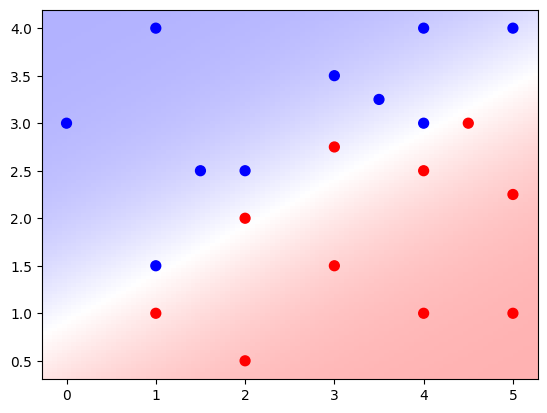

In [8]:
visualisation(X,y,model)

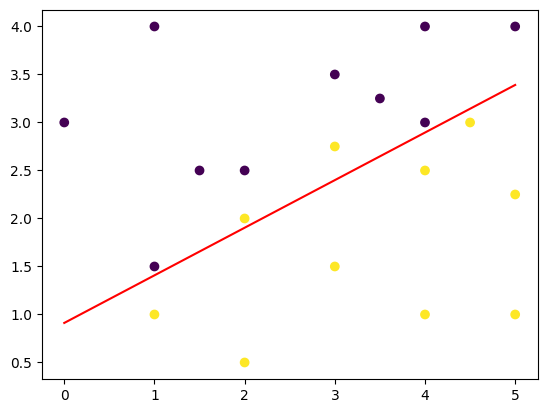

In [9]:
x = np.linspace(0,5,1000)
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(x,(-model.get_weights()[1]-x*model.get_weights()[0][0])/model.get_weights()[0][1],c='r')

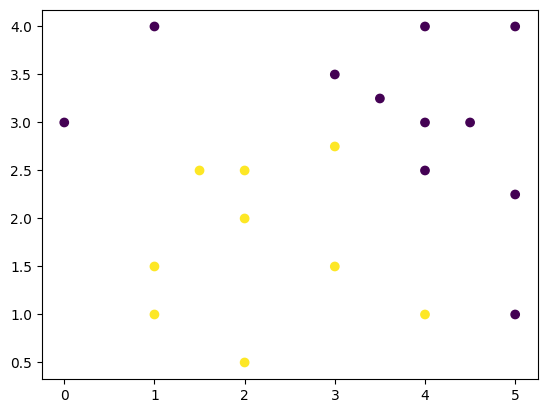

In [10]:
X = np.array([[0,3],[1,1.5],[1,4],[1.5,2.5],[2,2.5],[3,3.5],[3.5,3.25],[4,3],[4,4],[5,4],[1,1],[2,0.5],[2,2],[3,1.5],[3,2.75],[4,1],[4,2.5],[4.5,3],[5,1],[5,2.25]])
y = np.array([[0],[1],[0],[1],[1],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[0],[0],[0],[0]])
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_dim=2, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["binary_accuracy"])

In [ ]:
history = model.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - binary_accuracy: 0.5500 - loss: 0.6941
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - binary_accuracy: 0.5500 - loss: 0.6894
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - binary_accuracy: 0.5500 - loss: 0.6880
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - binary_accuracy: 0.5500 - loss: 0.6853
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - binary_accuracy: 0.5500 - loss: 0.6817
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - binary_accuracy: 0.5500 - loss: 0.6782
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - binary_accuracy: 0.5500 - loss: 0.6753
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - binary_accuracy: 0.5500 - loss: 0.6726
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - binary_accuracy: 0.5500 - loss: 0.6697
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - binary_accuracy: 0.5500 - loss: 0.6665
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - binary_accuracy: 0.5500 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


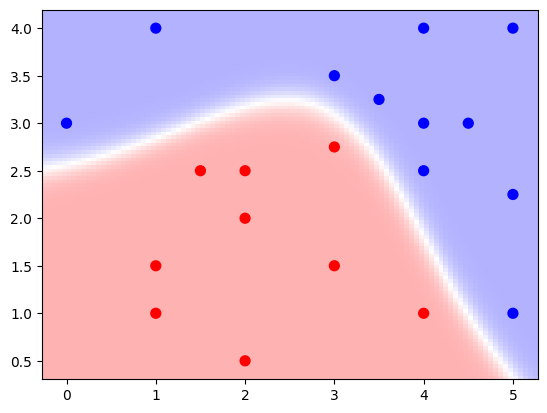

In [ ]:
visualisation(X, y, model)

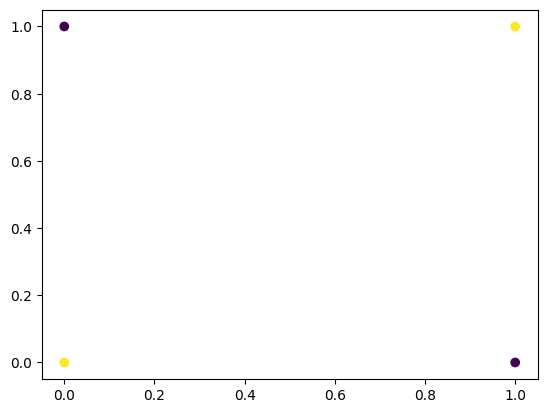

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[1],[0],[0],[1]])
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(2, input_dim=2, activation="sigmoid"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=2500)

Streaming output truncated to the last 5000 lines.
Epoch 1/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7496
Epoch 2/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7492
Epoch 3/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.7487
Epoch 4/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.7483
Epoch 5/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7479
Epoch 6/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7475
Epoch 7/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5000 - loss: 0.7471
Epoch 8/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.7466
Epoch 9/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7462
Epoch 10/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.7458
Epoch 11/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7454
Epoch 12/2500

  1/313 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step

<ipython-input-30-92d8dea72abc>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[0, :], X[1, :], c=y, cmap='bwr', s=50)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


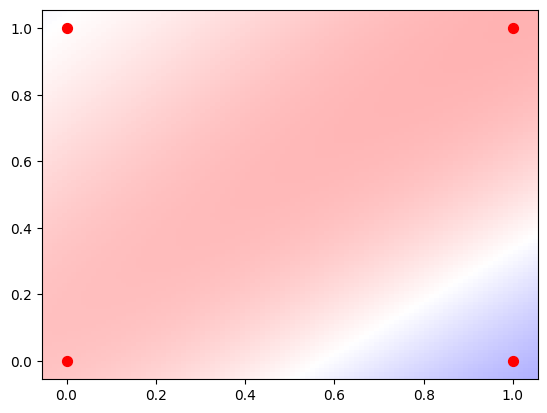

In [ ]:
visualisation(X, y, model)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


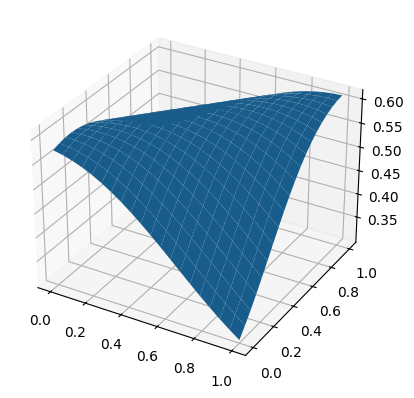

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
VX = np.linspace(0, 1, 20)
VY = np.linspace(0, 1, 20)
abs,ord = np.meshgrid(VX, VY)
entree = np.c_[abs.ravel(), ord.ravel()]
sortie = model.predict(entree)
Z = sortie.reshape(abs.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(abs, ord, Z)
plt.show()

In [ ]:
print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.57522184]
 [0.4486359 ]
 [0.30095163]
 [0.6124077 ]]
